In [2]:
!pip install ydata-profiling
!pip install catboost
!pip install xgboost
!pip install -U imbalanced-learn
!pip install -U scikit-learn
!pip install lightgbm
!pip install keras
!pip install tensorflow
!pip install scikit-learn==0.24.2
!pip install lazypredict


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached scikit-learn-0.24.2.tar.gz (7.5 MB)
  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'error'


  error: subprocess-exited-with-error
  
  Preparing metadata (pyproject.toml) did not run successfully.
  exit code: 1
  
  [20 lines of output]
  <string>:17: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  Partial import of sklearn during the build process.
  Traceback (most recent call last):
    File "C:\Users\user\PycharmProjects\phising_DataAnalysis\.venv\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
      main()
    File "C:\Users\user\PycharmProjects\phising_DataAnalysis\.venv\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
      json_out['return_val'] = hook(**hook_input['kwargs'])
                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\user\PycharmProjects\phising_DataAnalysis\.venv\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 149, in prepare_metadata_


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:

from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Loading Dataset

In [7]:
data_path = r"C:\Users\user\Downloads\archive (37)\Phising_Detection_Dataset.csv"
Dataset = pd.read_csv(data_path,nrows=15000)
Dataset


,SrNo,NumDots,UrlLength,NumDash,AtSymbol,IpAddress,HttpsInHostname,PathLevel,PathLength,NumNumericChars,Phising
0,0,3,72,0,0,0,0,5,44,0,1.00
1,1,3,144,0,0,0,0,3,16,41,1.00
2,2,3,58,0,0,0,0,2,24,0,1.00
3,3,3,79,1,0,0,0,6,50,0,1.00
4,4,3,46,0,0,0,0,4,29,2,1.00
...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,4,101,3,0,0,0,2,39,1,0.00
14996,14996,2,26,0,0,0,0,2,26,0,0.00
14997,14997,2,77,0,0,0,0,1,10,1,0.00
14998,14998,1,87,0,0,0,0,10,65,1,0.00


# Data analysis 

In [8]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SrNo             15000 non-null  int64  
 1   NumDots          15000 non-null  int64  
 2   UrlLength        15000 non-null  int64  
 3   NumDash          15000 non-null  int64  
 4   AtSymbol         15000 non-null  int64  
 5   IpAddress        15000 non-null  int64  
 6   HttpsInHostname  15000 non-null  int64  
 7   PathLevel        15000 non-null  int64  
 8   PathLength       15000 non-null  int64  
 9   NumNumericChars  15000 non-null  int64  
 10  Phising          14906 non-null  float64
dtypes: float64(1), int64(10)
memory usage: 1.3 MB


## Descriptive Statistics

In [9]:
Dataset.describe()

,SrNo,NumDots,UrlLength,NumDash,AtSymbol,IpAddress,HttpsInHostname,PathLevel,PathLength,NumNumericChars,Phising
count,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,15000.00,14906.00
mean,7499.50,2.11,64.26,1.69,0.00,0.01,0.04,2.91,34.29,4.05,0.41
std,4330.27,1.39,35.51,3.05,0.02,0.11,0.18,1.90,26.30,8.24,0.49
min,0.00,0.00,7.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,3749.75,1.00,40.00,0.00,0.00,0.00,0.00,2.00,16.00,0.00,0.00
50%,7499.50,2.00,58.00,0.00,0.00,0.00,0.00,3.00,29.00,1.00,0.00
75%,11249.25,3.00,79.00,2.00,0.00,0.00,0.00,4.00,48.00,5.00,1.00
max,14999.00,21.00,379.00,55.00,1.00,1.00,1.00,18.00,307.00,111.00,1.00


# Feature engineering and data cleaning

In [10]:
num_rows, num_columns = Dataset.shape


print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 15000
Number of columns: 11


In [11]:
print("Number of NULL values:\n", Dataset.isnull().sum())

Number of NULL values:
 SrNo                0
NumDots             0
UrlLength           0
NumDash             0
AtSymbol            0
IpAddress           0
HttpsInHostname     0
PathLevel           0
PathLength          0
NumNumericChars     0
Phising            94
dtype: int64


In [12]:
print("Number of Duplicate Rows:", Dataset.duplicated().sum())

Number of Duplicate Rows: 0


In [13]:
Dataset = Dataset.dropna(subset=['Phising'])

numeric_columns = Dataset.select_dtypes(include=['number'])


numeric_column_names = numeric_columns.columns.tolist()


print("Numerical Column Names:")
print(numeric_column_names)

Numerical Column Names:
['SrNo', 'NumDots', 'UrlLength', 'NumDash', 'AtSymbol', 'IpAddress', 'HttpsInHostname', 'PathLevel', 'PathLength', 'NumNumericChars', 'Phising']


# EDA

## Distribution graphs (Histograms)

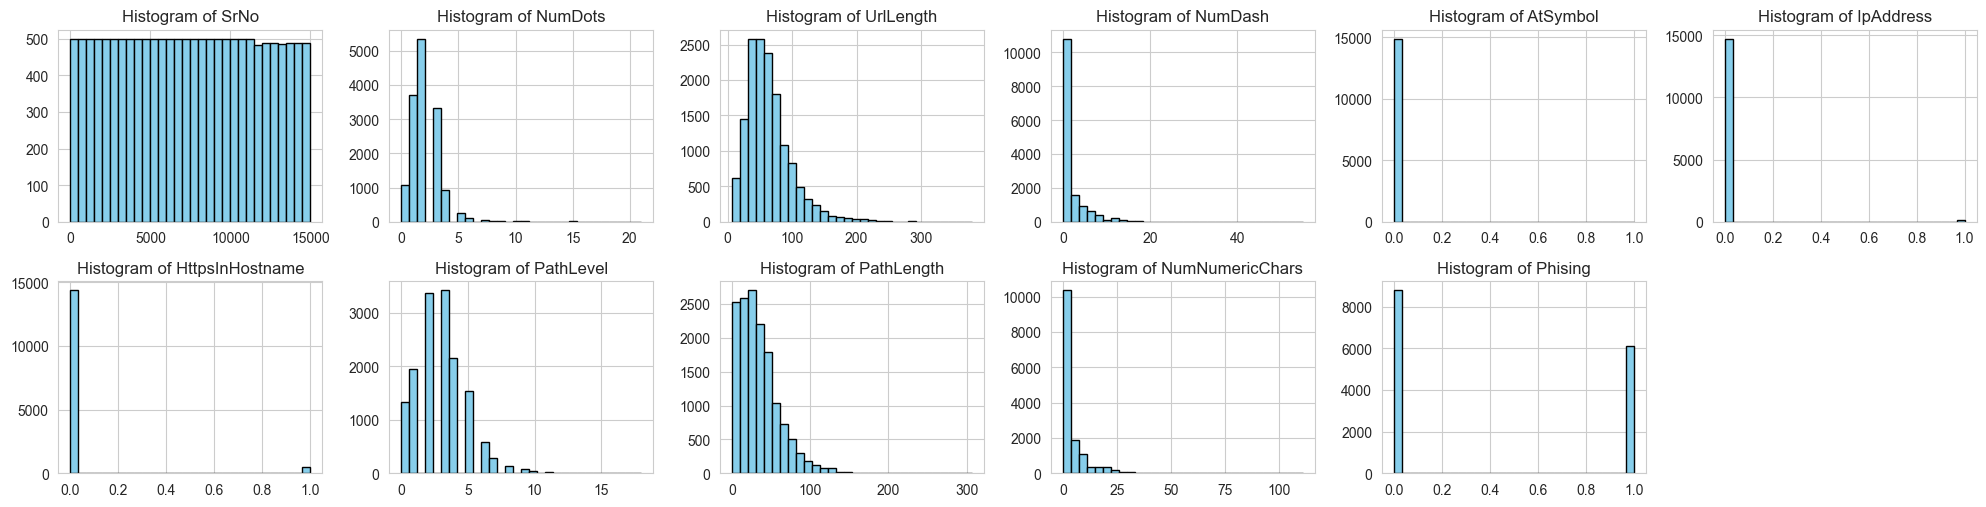

In [14]:
plt.figure(figsize=(20, 15))

for i, column in enumerate(numeric_column_names):
    plt.subplot(6, 6, i + 1)  # Adjust the subplot grid as needed
    plt.hist(Dataset[column], bins=30, color='skyblue', edgecolor='black')
    plt.title(f"Histogram of {column}")

plt.tight_layout()
plt.show()

## Correlation matrix

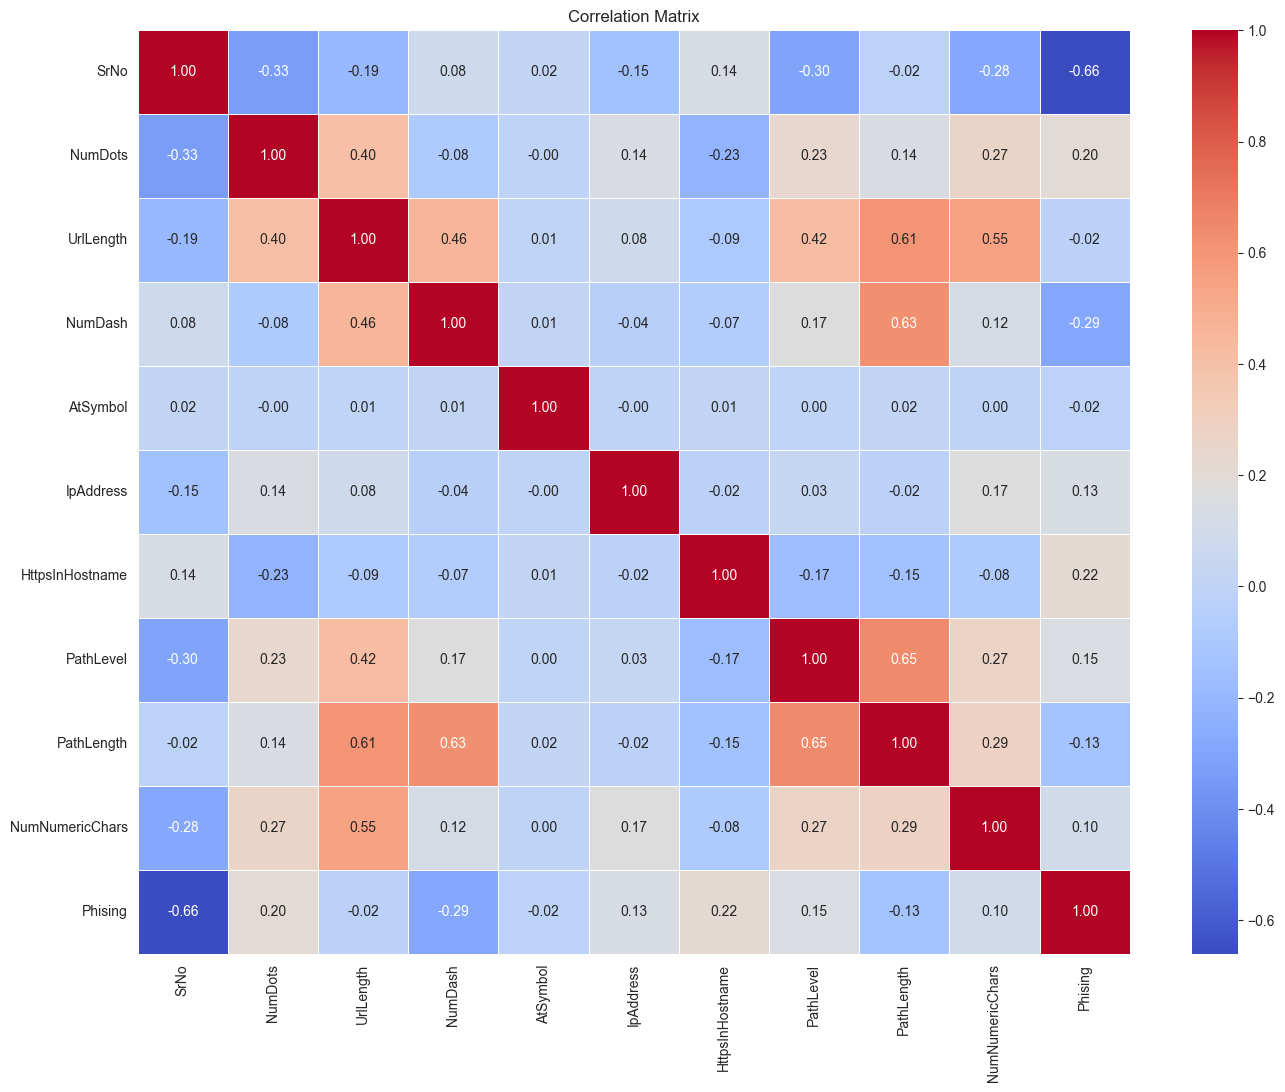

In [15]:
numeric_columns = Dataset[numeric_column_names]


correlation_matrix = numeric_columns.corr()


plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

## Number of Phihing(Attack) and Benign(Not-Attack)

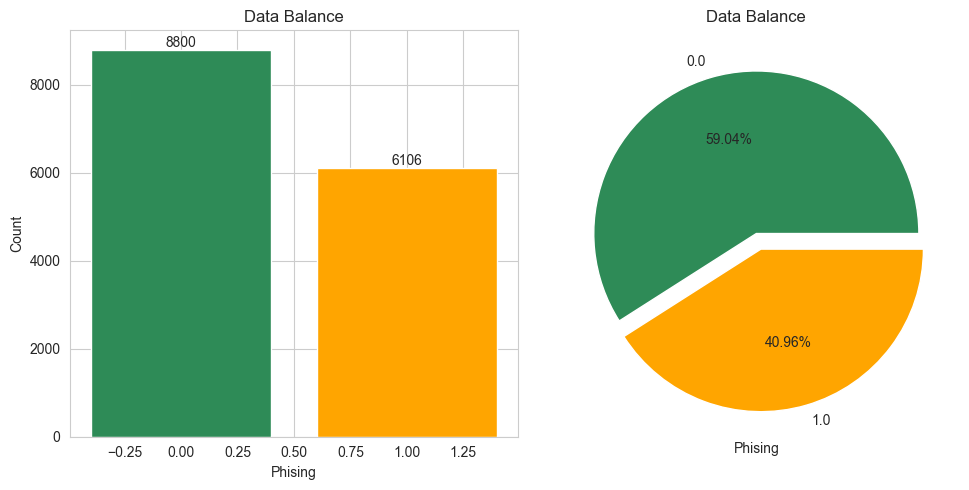

In [19]:
attack_counts = Dataset['Phising'].value_counts()


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))


bars = axes[0].bar(attack_counts.index, attack_counts.values, color=['seagreen', 'orange'])
axes[0].set_xlabel('Phising')
axes[0].set_ylabel('Count')
axes[0].set_title('Data Balance')


for bar, count in zip(bars, attack_counts.values):
    axes[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count),
                 ha='center', va='bottom')


Dataset['Phising'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.2f%%', colors=['seagreen', 'orange'], ax=axes[1])
axes[1].set_xlabel('Phising')
axes[1].set_ylabel('') 
axes[1].set_title('Data Balance')


plt.tight_layout()


plt.show()

In [20]:

X = Dataset.drop(columns=['Phising'])  
y = Dataset['Phising']

### Identifying Features with Overwhelmingly Repeated Maximum Values

In [21]:
def identify_repeated_max(df):
    cols_to_drop = []  

    cols = df.columns.values
    for col in cols:
        max_count = df[col].value_counts().max()
        total = len(df)
        max_percentage = (max_count / total) * 100

        if max_percentage > 90:  # Check if repetition percentage is over 97%
            print(f"Feature '{col}' has the largest value repeated more than 70% of the time.")
            print(f"Largest value: {df[col].value_counts().idxmax()}")
            print(f"Repetition percentage: {max_percentage:.2f}%")
            print()
            cols_to_drop.append(col)  

    return cols_to_drop  

In [22]:
columns_to_drop = identify_repeated_max(X)

print("Columns to be dropped:", columns_to_drop)

Feature 'AtSymbol' has the largest value repeated more than 70% of the time.
Largest value: 0
Repetition percentage: 99.95%

Feature 'IpAddress' has the largest value repeated more than 70% of the time.
Largest value: 0
Repetition percentage: 98.77%

Feature 'HttpsInHostname' has the largest value repeated more than 70% of the time.
Largest value: 0
Repetition percentage: 96.45%

Columns to be dropped: ['AtSymbol', 'IpAddress', 'HttpsInHostname']


In [23]:
cols_to_drop = identify_repeated_max(X)

X1 = X.drop(cols_to_drop, axis=1)

Feature 'AtSymbol' has the largest value repeated more than 70% of the time.
Largest value: 0
Repetition percentage: 99.95%

Feature 'IpAddress' has the largest value repeated more than 70% of the time.
Largest value: 0
Repetition percentage: 98.77%

Feature 'HttpsInHostname' has the largest value repeated more than 70% of the time.
Largest value: 0
Repetition percentage: 96.45%



In [27]:
num_rows, num_columns = X1.shape


print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 14906
Number of columns: 7


## OverSampling

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

In [25]:
smote = SMOTE(random_state=42)


X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [26]:
y_train_resampled

0       1.00
1       1.00
2       0.00
3       1.00
4       0.00
        ... 
14121   1.00
14122   1.00
14123   1.00
14124   1.00
14125   1.00
Name: Phising, Length: 14126, dtype: float64

# Balance or Non-Balance?

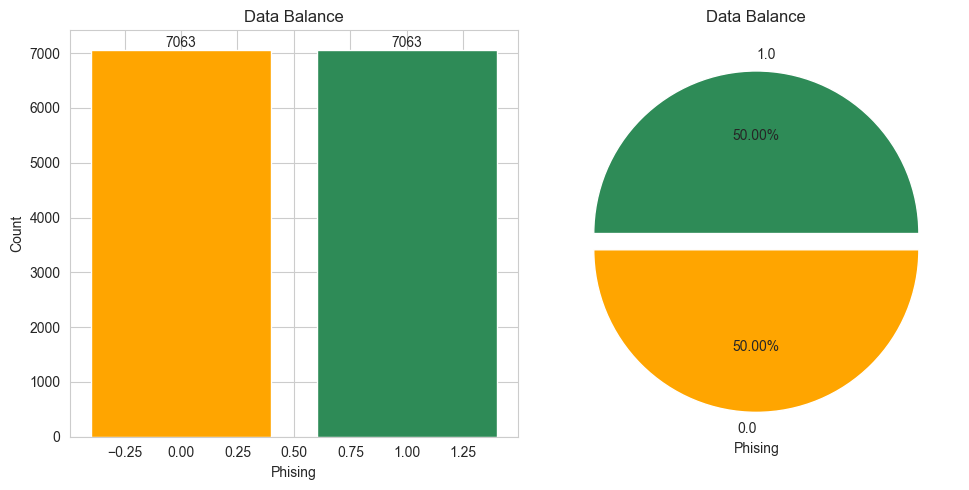

In [28]:

attack_counts = y_train_resampled.value_counts()


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))


bars = axes[0].bar(attack_counts.index, attack_counts.values, color=['seagreen', 'orange'])
axes[0].set_xlabel('Phising')
axes[0].set_ylabel('Count')
axes[0].set_title('Data Balance')


for bar, count in zip(bars, attack_counts.values):
    axes[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count),
                 ha='center', va='bottom')


y_train_resampled.value_counts().plot.pie(explode=[0, 0.1], autopct='%1.2f%%', colors=['seagreen', 'orange'], ax=axes[1])
axes[1].set_xlabel('Phising')
axes[1].set_ylabel('')
axes[1].set_title('Data Balance')


plt.tight_layout()


plt.show()

In [33]:
print("Number of Duplicate Rows:", Dataset.duplicated().sum())

Number of Duplicate Rows: 0


# Modeling

## Apply LazyClassifier

In [34]:
clf = LazyClassifier(predictions=True)
models, predictions = clf.fit(X_train_resampled, X_test, y_train_resampled, y_test)


 97%|█████████▋| 30/31 [00:48<00:00,  1.30it/s]

[LightGBM] [Info] Number of positive: 7063, number of negative: 7063
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001169 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 753
[LightGBM] [Info] Number of data points in the train set: 14126, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


100%|██████████| 31/31 [00:49<00:00,  1.60s/it]


In [35]:
models
    

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.99,0.99,0.99,0.99,0.93
AdaBoostClassifier,0.99,0.99,0.99,0.99,0.68
XGBClassifier,0.99,0.99,0.99,0.99,0.83
RandomForestClassifier,0.98,0.98,0.98,0.98,0.93
BaggingClassifier,0.98,0.98,0.98,0.98,0.20
ExtraTreesClassifier,0.98,0.98,0.98,0.98,0.70
DecisionTreeClassifier,0.98,0.98,0.98,0.98,0.04
ExtraTreeClassifier,0.97,0.97,0.97,0.97,0.02
SVC,0.97,0.97,0.97,0.97,2.28
